In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [5]:
data = pd.read_csv('../data/random_data.csv')
data.head()

,feature1,feature2,class
0,0.72,0.82,-1
1,0.91,-0.69,-1
2,0.03,0.93,-1
3,0.12,0.25,-1
4,0.96,0.47,-1


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

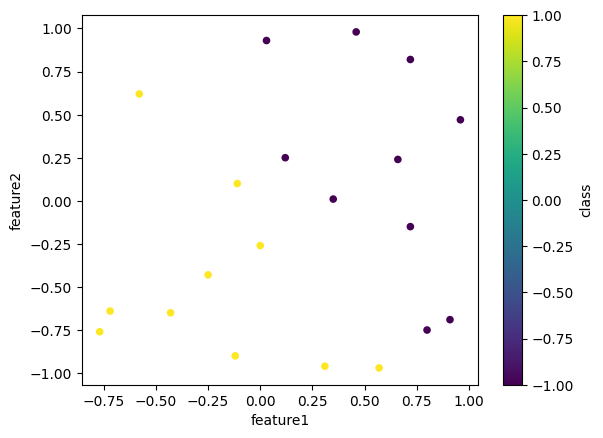

In [8]:
data.plot.scatter(x='feature1', y='feature2', c='class', colormap='viridis')

In [15]:
data_np = data.to_numpy()
data_np[1][:-1]

array([ 0.91, -0.69])

In [26]:
# Initialise weights
weights = [0.2, 1.0, -1.0]

# Initialise bias
bias = [1]

# Predict function
def predict(inputs, weights, bias, threshold):
    total_activation = 0.0
    for input, weight in zip(inputs, weights):
        total_activation += input*weight
    total_activation += bias
    return 1.0 if total_activation >= threshold else 0.0

# Accuracy function
def accuracy(data, bias, weights):
    num_correct = 0.0
    predictions = []
    for i in range(len(data)):
        # get predicted classification
        prediction = predict(data[i][:-1], weights, bias, 0.5)
        predictions.append(prediction)
        if prediction == data[i][-1]: num_correct+= 1.0
    print('Predictions: ', predictions)
    
    return num_correct/float(len(data))  # Returns overall prediction accuracy

# Train the Perceptron on the data, the trained weights are returned at the end of the function
def train_weights(
    data, weights, bias, n_epochs=10, learning_rate=1.0, do_plot=False, stop_early=True, verbose=True
):
    # iterate for the number of epochs requested
    for epoch in range(n_epochs):
        # calculate the current accuracy 
        current_acc = accuracy(data, bias, weights)
        # print out information
        print("\nEpoch %s \nWeights: "%epoch, weights)
        print("Accuracy: ", current_acc)
        
        # check if we have finished the training
        if current_acc == 1.0 and stop_early: break
        
        # check if we should plot the current results
        if do_plot: pass
        
        # iterate over teach training input
        for i in range(len(data)): 
            # calculate prediction 
            prediction = predict(data[i][:-1], weights, bias, 0.5)
            # calculate error
            error = data[i][-1] - prediction
        
        # iterate over each weight and update it
        for j in range(len(weights)):
            weights[j] = weights[j] + (learning_rate * error * data[i][j])
        
        # update the bias
        bias = bias + (learning_rate * error)

    # plot out the final results
    
    return weights

In [27]:
train_weights(data_np, weights, bias, n_epochs=10, learning_rate=1.0, do_plot=True, stop_early=True)

Predictions:  [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]

Epoch 0 
Weights:  [0.2, 1.0, -1.0]
Accuracy:  0.2
Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [-0.5700000000000001, 0.24, 0.0]
Accuracy:  0.5
Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [-0.5700000000000001, 0.24, 0.0]
Accuracy:  0.5
Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [-0.5700000000000001, 0.24, 0.0]
Accuracy:  0.5
Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 4 
Weights:  [-0.5700000000000001, 0.24, 0.0]
Accuracy:  0.5
Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

[-0.5700000000000001, 0.24, 0.0]